In [2]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
#libraries

import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from matplotlib import pyplot as plt
from keras import optimizers
from keras.callbacks import TensorBoard
from sklearn.model_selection import cross_val_score
from numpy.random import seed
from tensorflow import set_random_seed
seed(1)
seed=2
set_random_seed(2)

ModuleNotFoundError: No module named 'keras'

In [0]:
# load data and preprocessing

def rhead(x, nrow = 6, ncol = 4):
    pd.set_option('display.expand_frame_repr', False)
    seq = np.arange(0, len(x.columns), ncol)
    for i in seq:
        print(x.loc[range(0, nrow), x.columns[
                range(i, min(i+ncol, len(x.columns)))]])
    pd.set_option('display.expand_frame_repr', True)
    
encoder = LabelBinarizer()
iris = datasets.load_iris()
iris_data_df = pd.DataFrame(data=iris.data, columns=iris.feature_names,
                       dtype=np.float32)
target = encoder.fit_transform(iris.target)
iris_target_df = pd.DataFrame(data=target, columns=iris.target_names)

X_train, X_test, y_train, y_test = train_test_split(iris_data_df,
                                                 iris_target_df,
                                                 test_size=0.2,
                                                 random_state=seed)
scaler = MinMaxScaler(feature_range=(0,1))

X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)

In [38]:
# soale 1.A
def model():
    """build the Keras model callback"""
    model = Sequential()
    model.add(Dense(3, input_dim=4, activation='elu', name='layer_1'))
    model.add(Dense(3, activation='elu', name='layer_2'))
    model.add(Dense(3, activation='elu', name='layer_3'))
    model.add(Dense(3, activation='softmax', name='output_layer'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model().summary()

model = model()
history = model.fit(
       X_train,
       y_train,
      epochs=200, batch_size=1, validation_split=0.15,
       shuffle=True,
       verbose=2 # this will tell keras to print more detailed info
       # during trainnig to know what is going on
       )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
layer_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
layer_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
output_layer (Dense)         (None, 3)                 12        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
Train on 102 samples, validate on 18 samples
Epoch 1/200
 - 8s - loss: 1.1683 - acc: 0.3137 - val_loss: 1.1711 - val_acc: 0.3333
Epoch 2/200
 - 1s - loss: 1.0723 - acc: 0.3529 - val_loss: 1.0566 - val_acc: 0.3333
Epoch 3/200
 - 1s - loss: 0.9868 - acc: 0.3

In [39]:
#run the test dataset
test_error_rate = model.evaluate(X_test, y_test, verbose=0)
print(
      "{} : {:.2f}%".format(model.metrics_names[1],
              test_error_rate[1]*100))
print(
      "{} : {:.2f}%".format(model.metrics_names[0],
              test_error_rate[0]*100))

#run the train dataset
train_error_rate = model.evaluate(X_train, y_train, verbose=2)
print(
      "{} : {:.2f}%".format(model.metrics_names[1],
              train_error_rate[1]*100))
print(
      "{} : {:.2f}%".format(model.metrics_names[0],
              train_error_rate[0]*100))

acc : 96.67%
loss : 3.95%
acc : 97.50%
loss : 5.13%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


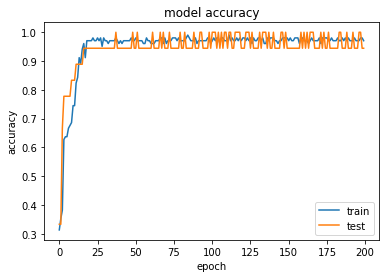

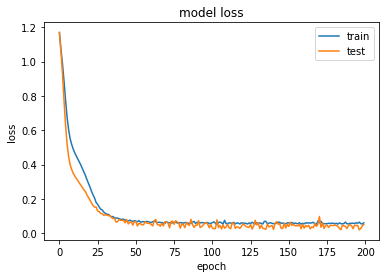

In [40]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [43]:
# soale 1.B

warnings.simplefilter(action='ignore', category=FutureWarning)

n_features = X_train.shape[1]
n_classes = y_train.shape[1]

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='elu'))
        model.add(Dense(output_dim, activation='softmax'))
        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 3, i, 'model_{}'.format(i)) 
          for i in range(1, 11)]

for create_model in models:
    create_model().summary()

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, y_train,
                                 batch_size=8,
                                 epochs=100,
                                 verbose=2,
                                 validation_data=(X_test, y_test),
                                 callbacks=[cb])
        
    history_dict[model.name] = [history_callback, model]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1106 (Dense)           (None, 3)                 15        
_________________________________________________________________
dense_1107 (Dense)           (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1108 (Dense)           (None, 3)                 15        
_________________________________________________________________
dense_1109 (Dense)           (None, 3)                 12        
_________________________________________________________________
dense_1110 (Dense)           (None, 3)                 12        
Total params: 39
Trainable params: 39
Non-trai

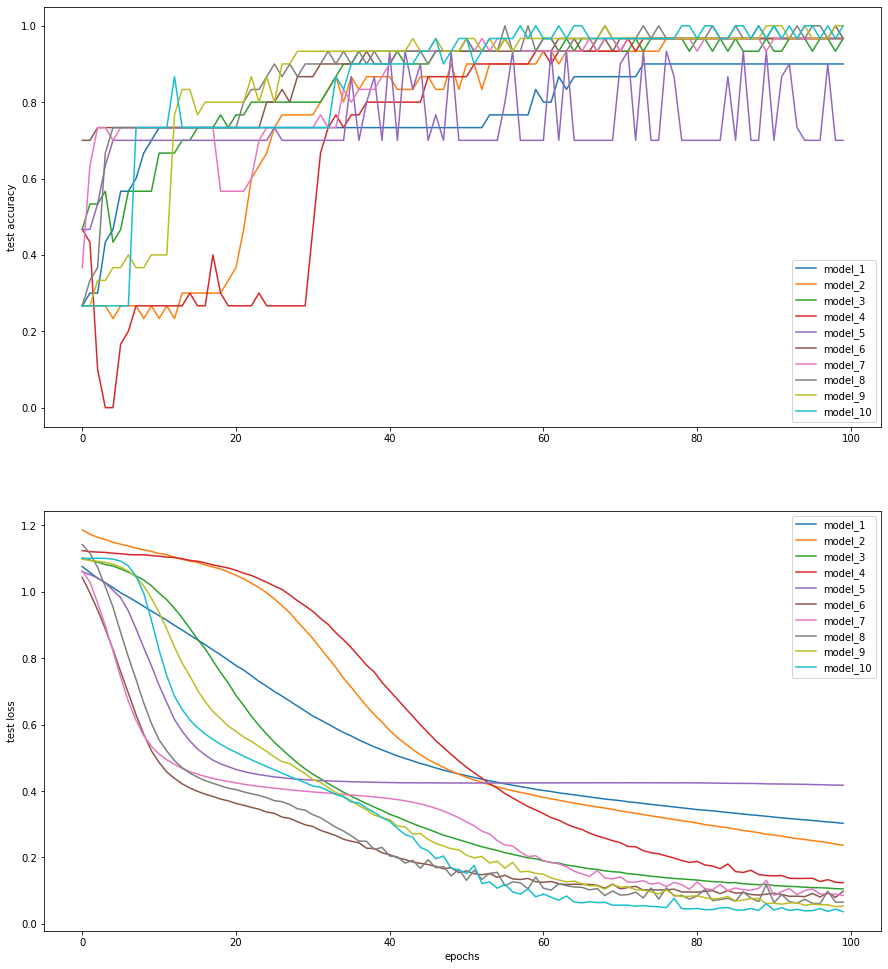

<Figure size 432x288 with 0 Axes>

In [44]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 17))
plt.figure()

for model_name in history_dict: 
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('test accuracy')
ax2.set_ylabel('test loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()


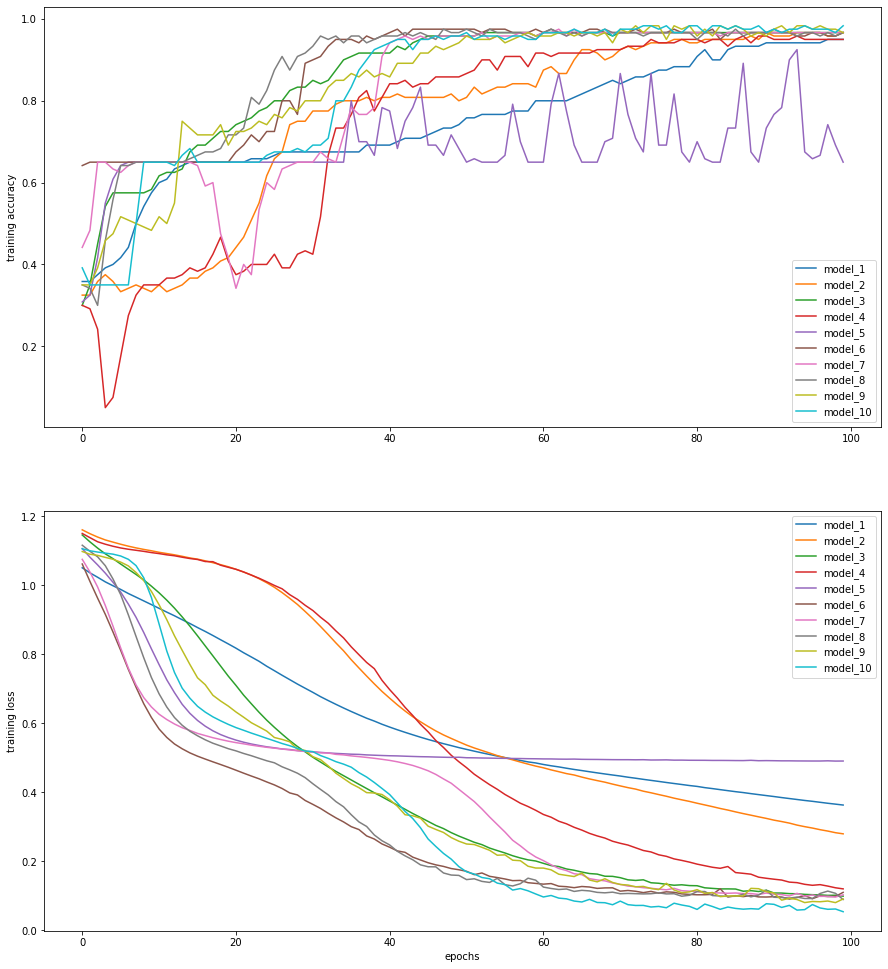

In [45]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 17))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['acc']
    val_loss = history_dict[model_name][0].history['loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [46]:
for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    scoreS = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', scoreS[0])
    print('Test accuracy:', scoreS[1])
    scoreR = model.evaluate(X_train, y_train, verbose=0)
    print('Train loss:', scoreR[0])
    print('Train accuracy:', scoreR[1])

Model name: model_1
Test loss: 1.3800307512283325
Test accuracy: 0.2666666805744171
Train loss: 1.396491519610087
Train accuracy: 0.35
Model name: model_2
Test loss: 1.0498813390731812
Test accuracy: 0.46666666865348816
Train loss: 1.0980257431666056
Train accuracy: 0.31666666467984517
Model name: model_3
Test loss: 1.1432849168777466
Test accuracy: 0.06666667014360428
Train loss: 1.1395485003789265
Train accuracy: 0.08333333333333333
Model name: model_4
Test loss: 1.1615791320800781
Test accuracy: 0.1666666716337204
Train loss: 1.1794813632965089
Train accuracy: 0.2250000019868215
Model name: model_5
Test loss: 1.086849331855774
Test accuracy: 0.36666667461395264
Train loss: 1.078089721997579
Train accuracy: 0.425
Model name: model_6
Test loss: 1.1265078783035278
Test accuracy: 0.46666666865348816
Train loss: 1.1589430809020995
Train accuracy: 0.2999999980131785
Model name: model_7
Test loss: 1.125860333442688
Test accuracy: 0.2666666805744171
Train loss: 1.1087061007817587
Train accu

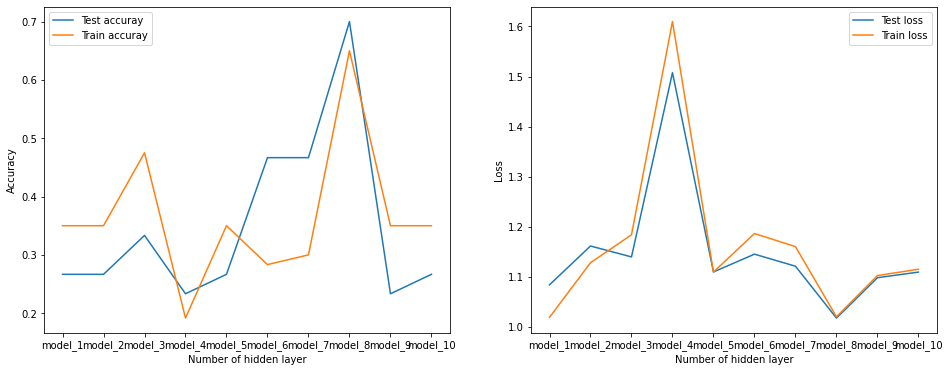

In [47]:
N=[]
AT=[]
AS=[]
LS=[]
LT=[]
for create_model in models:
    model = create_model()
    N.append(model.name)
    scoreS = model.evaluate(X_test, y_test, verbose=0)
    LS.append(scoreS[0])
    AS.append(scoreS[1])
    scoreR = model.evaluate(X_train, y_train, verbose=0)
    LT.append(scoreR[0])
    AT.append(scoreR[1])


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(N,AS, label='Test accuray')
plt.plot(N,AT, label='Train accuray')
plt.xlabel("Number of hidden layer")
plt.ylabel('Accuracy')
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(N,LS, label='Test loss')
plt.plot(N,LT, label='Train loss')
plt.xlabel("Number of hidden layer")
plt.ylabel('Loss')
plt.legend();

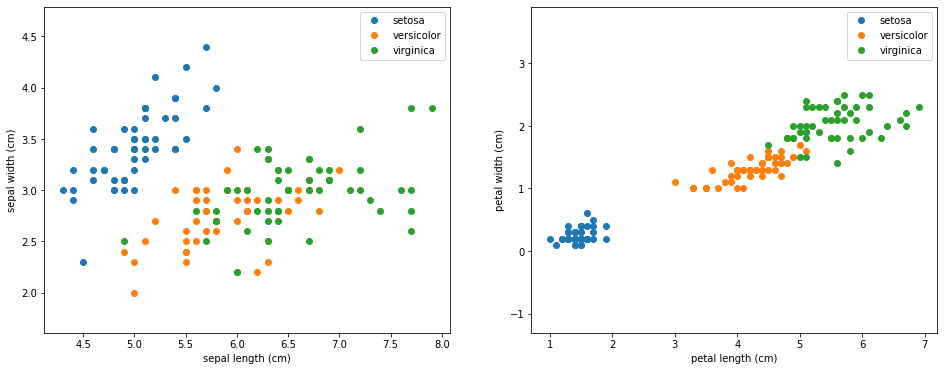

In [9]:
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();


In [90]:
#soale 2

def model():
    """build the Keras model callback"""
    model = Sequential()
    model.add(Dense(3, input_dim=4, activation='softmax', name='layer_1'))
    model.add(Dense(3, activation='softmax', name='layer_2'))
    model.add(Dense(3, activation='softmax', name='layer_3'))
    model.add(Dense(3, activation='softmax', name='output_layer'))
    sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True) #Nesterov
    model.compile(loss='MSE', optimizer=sgd, metrics=['accuracy']) #MSE
    #sgd = optimizers.SGD(lr=0.01, momentum=0, nesterov=False) #SGD
    #sgd = optimizers.SGD(lr=0.01, momentum=0.9, nesterov=False) #momentum
    #model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) #categorical_crossentropy
    return model

model = model()
history = model.fit(
       X_train,
       y_train,
      epochs=500, batch_size=1
      #len(X_train) for gradient descent
      ,validation_split=0.15,shuffle=True,
      verbose=2)

#run the test dataset
test_error_rate = model.evaluate(X_test, y_test, verbose=0)
print(
      "{} : {:.2f}%".format(model.metrics_names[1],
              test_error_rate[1]*100))
print(
      "{} : {:.2f}%".format(model.metrics_names[0],
              test_error_rate[0]*100))

#run the train dataset
train_error_rate = model.evaluate(X_train, y_train, verbose=2)
print(
      "{} : {:.2f}%".format(model.metrics_names[1],
              train_error_rate[1]*100))
print(
      "{} : {:.2f}%".format(model.metrics_names[0],
              train_error_rate[0]*100))

Train on 102 samples, validate on 18 samples
Epoch 1/500
 - 10s - loss: 0.2275 - acc: 0.2941 - val_loss: 0.2229 - val_acc: 0.2222
Epoch 2/500
 - 1s - loss: 0.2219 - acc: 0.3529 - val_loss: 0.2269 - val_acc: 0.2222
Epoch 3/500
 - 1s - loss: 0.2204 - acc: 0.3725 - val_loss: 0.2303 - val_acc: 0.2222
Epoch 4/500
 - 1s - loss: 0.2205 - acc: 0.3725 - val_loss: 0.2298 - val_acc: 0.2222
Epoch 5/500
 - 1s - loss: 0.2203 - acc: 0.2843 - val_loss: 0.2287 - val_acc: 0.2222
Epoch 6/500
 - 1s - loss: 0.2205 - acc: 0.3333 - val_loss: 0.2267 - val_acc: 0.2222
Epoch 7/500
 - 1s - loss: 0.2192 - acc: 0.3725 - val_loss: 0.2263 - val_acc: 0.2222
Epoch 8/500
 - 1s - loss: 0.2193 - acc: 0.3333 - val_loss: 0.2277 - val_acc: 0.2222
Epoch 9/500
 - 1s - loss: 0.2189 - acc: 0.3039 - val_loss: 0.2236 - val_acc: 0.2222
Epoch 10/500
 - 1s - loss: 0.2181 - acc: 0.3529 - val_loss: 0.2246 - val_acc: 0.2222
Epoch 11/500
 - 1s - loss: 0.2192 - acc: 0.3333 - val_loss: 0.2211 - val_acc: 0.2222
Epoch 12/500
 - 1s - loss: 0

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


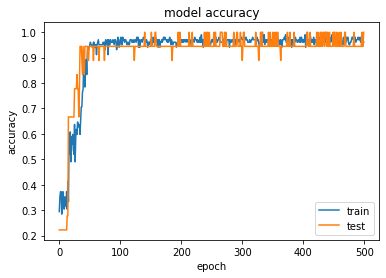

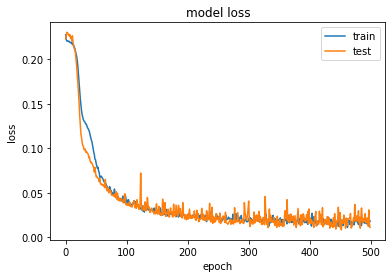

In [93]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()